In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [12]:
def draw_from_file(filename: str):
    method = ''
    if filename.endswith('ek.txt'):
        method = 'Edmonds-Karp'
    elif filename.endswith('pl.txt'):
        method = 'Push-Relabel'
    else:
        print(f"Название файла некорректно: {filename}")
        return
    file = open(filename, 'r')
    M_10 = {}
    M_10000 = {}
    time_10 = []
    time_10000 = []
    line = file.readline()
    while line:
        n, m, u, time = line.split()
        n = int(n)
        #m = int(m)
        u = int(u)
        time = float(time)
        if u == 10:
            M_10[m] = float(time)
            time_10.append(int(time))
            
        elif u == 10000:
            M_10000[m] = float(time)
            time_10000.append(float(time))
        line = file.readline()
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    g = axes[0].bar(M_10.keys(), M_10.values())
    g1 = axes[1].bar(M_10000.keys(), M_10000.values())
    axes[0].set_xlabel('u=10')
    axes[1].set_xlabel('u=10000')
    fig.suptitle(f"Тест методом {method}, n={n}")
    fig.supxlabel('m')
    fig.supylabel('Время')
    
    plt.show()

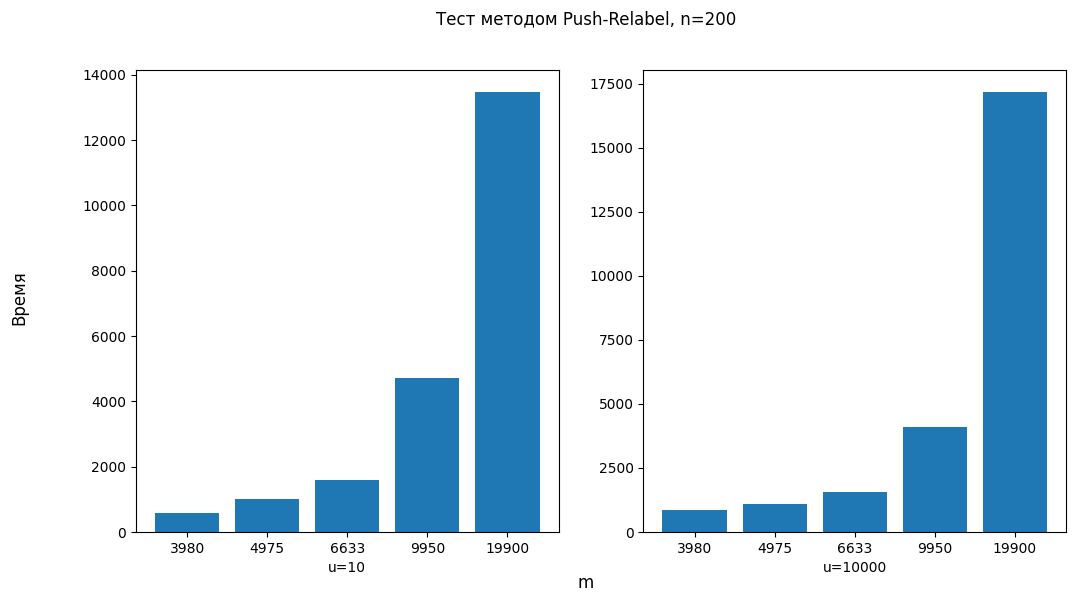

In [15]:
draw_from_file('test_results/test_200_pl.txt')

In [24]:
def draw_comparison(filename1: str, filename2: str):
    """
    Первый аргумент Edmond-Karp, второй аргумент - Push Relabel 
    """
    if not filename1.endswith('ek.txt') and filename2.endswith('pr.txt'):
        print('Первый аргумент - файл Edmond-Karp, второй - Push-Relabel')
        return
    file = open(filename1, 'r')
    ek_10 = {}
    ek_10000 = {}
    
    line = file.readline()
    while line:
        n, m, u, time = line.split()
        n = int(n)
        m = int(m)
        u = int(u)
        time = float(time)
        if u == 10:
            ek_10[m] = float(time)
        elif u == 10000:
            ek_10000[m] = float(time)
        line = file.readline()
    file.close()
    
    # Читаем Push-Relabel
    pr_10 = {}
    pr_10000 = {}
    file = open(filename2, 'r')
    line = file.readline()
    while line:
        n1, m, u, time = line.split()
        if int(n1) != n:
            print("Файлы для сравнения содержат данные об экспериментах с разным количеством вершин")
            return
        n = int(n)
        #m = int(m)
        u = int(u)
        time = float(time)
        if u == 10:
            pr_10[m] = float(time)
        elif u == 10000:
            pr_10000[m] = float(time)
        line = file.readline()
    file.close()
    data_10 = {'m': [], 'time': [], 'method': []}
    data_10000 = {'m': [], 'time': [], 'method': []}
    
    # Создаём датафрейм
    for key in ek_10.keys():
        data_10['m'].append(int(key))
        data_10['time'].append(ek_10[key])
        data_10['method'].append('Edmonds-Karp')
    
    for key in ek_10000.keys():
        data_10000['m'].append(int(key))
        data_10000['time'].append(ek_10000[key])
        data_10000['method'].append('Edmonds-Karp')
        
    for key in pr_10.keys():
        data_10['m'].append(int(key))
        data_10['time'].append(pr_10[key])
        data_10['method'].append('Push-Relabel')
        
    for key in pr_10000.keys():
        data_10000['m'].append(int(key))
        data_10000['time'].append(pr_10000[key])
        data_10000['method'].append('Push-Relabel')
        
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    
    
    g = sns.barplot(data=data_10, x='m', y='time', hue='method',ax=axes[0])
    g1 = sns.barplot(data=data_10000, x='m', y='time', hue='method',ax=axes[1])
    g.set(xlabel='u=10', ylabel=None)
    g1.set(xlabel='u=10000', ylabel=None)
    fig.suptitle(f"n={n}")
    fig.supylabel('Время')
    

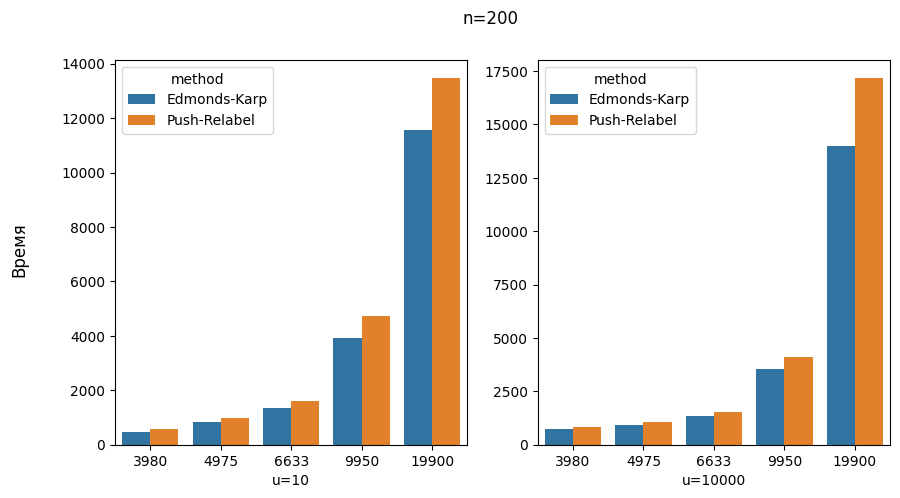

In [25]:
draw_comparison('test_results/test_200_ek.txt', 'test_results/test_200_pl.txt')